### LA Out Migrators - Median Monthly Rent & Mortgage
*Bar & line plots represent the same data

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

### Median Rent

In [3]:
#Removing rows containing rent of 0 (i.e. N/A, as per: https://usa.ipums.org/usa-action/variables/RENT#codes_section)
rnt = file[file.RENT != 0]
len(rnt)

16594

In [4]:
rent = pd.DataFrame()
for year in range(2006, 2018):
    df = rnt[rnt.YEAR == year]
    
    rents = np.array([])
    for i, row in df[['RENT', 'PERWT']].iterrows():
        amounts = np.full(row.PERWT, row.RENT)
        rents = np.append(rents, amounts)
    median = np.median(rents)
    
    
    individual = {'Year':pd.Series(year), 'Rent':pd.Series(median)}
    values = pd.DataFrame(individual)
    rent = pd.concat([rent, values])
year = rent.Year.astype('str')
rent.Year = pd.to_datetime(year)

In [5]:
#Plotting data via Altair
base1 = alt.Chart(rent).encode(
    x=alt.X('Year', axis=alt.Axis(grid=False, labelFlush=False), title=None)
).configure_view(
    strokeWidth=0
).properties(
title='LA Out Migrators - Median Monthly Rent', width=500)

In [6]:
bar1 = base1.mark_bar(size=30).encode(y=alt.Y('Rent', 
                                              title=None, 
                                              axis=alt.Axis(offset=10, format='$f'), 
                                              scale=alt.Scale(domain=[0,1400]))) 

line1 = base1.mark_line(strokeWidth=4).encode(y=alt.Y('Rent', 
                                                      title=None, 
                                                      axis=alt.Axis(format='$f'), 
                                                      scale=alt.Scale(domain=[800, 1400])))

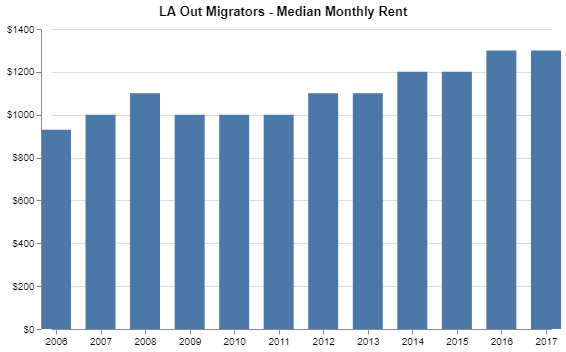

In [7]:
bar1

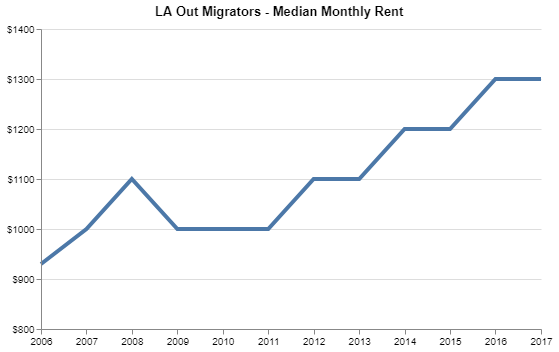

In [8]:
line1

------------

### Median Mortgage

In [9]:
#Removing rows containing N/A from mortgage column (indicated by 0)
mort = file[file.MORTAMT1 != 0]
len(mort)

10597

In [10]:
mortgage = pd.DataFrame()
for year in range(2006, 2018):
    df = mort[mort.YEAR == year]

    mortgages = np.array([])
    for i, row in df[['MORTAMT1', 'PERWT']].iterrows():
        amounts = np.full(row.PERWT, row.MORTAMT1)
        mortgages = np.append(mortgages, amounts)
    median = np.median(mortgages)
    
    individual = {'Year':pd.Series(year), 'Mortgage':pd.Series(median)}
    values = pd.DataFrame(individual)
    mortgage = pd.concat([values, mortgage])
    
years = mortgage.Year.astype('str')
mortgage.Year = pd.to_datetime(years)

In [11]:
#Plotting data via Altair
base2 = alt.Chart(mortgage).encode(
    x=alt.X('Year', axis=alt.Axis(grid=False, labelFlush=False), title=None)
).configure_view(
    strokeWidth=0
).properties(
title='LA Out Migrators - Median Monthly Mortgage', width=500)

In [12]:
bar2 = base2.mark_bar(size=30).encode(y=alt.Y('Mortgage', 
                                            title=None, 
                                            axis=alt.Axis(offset=10, format='$f'), 
                                            scale=alt.Scale(domain=[0,2000])))

line2 = base2.mark_line(strokeWidth=4).encode(y=alt.Y('Mortgage', 
                                                    title=None,
                                                    axis=alt.Axis(format='$f'),
                                                    scale=alt.Scale(domain=[1300, 1900])))

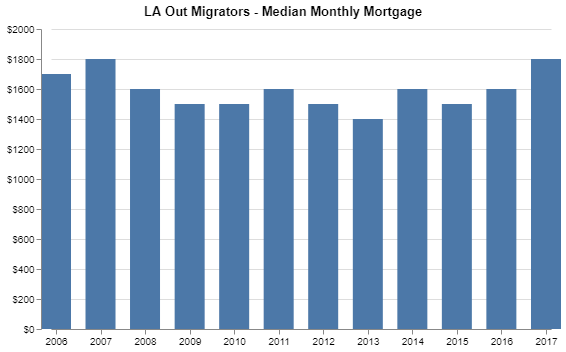

In [13]:
bar2

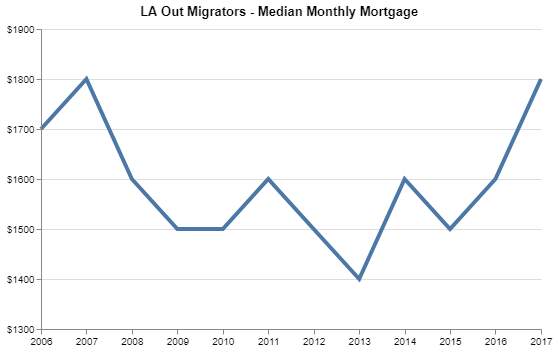

In [14]:
line2